# Machine Learning Project : Text Classification using NLP Methods

- **Authors:**
    - Ivan Perez (23-325-657)
    - Duncan Watson (17-811-613)
    - Sofiya Pleshcheva (19-311-752)


# Exploratory Data Analysis

In [1]:
import pandas as pd # for manipulate data frame
import matplotlib.pyplot as plt # for plots
import seaborn as sns

First we load our Pandas library as well as matplotlib and seaborn for our plots. We then look at the head of our dataseat to have a brief look.

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,Id,post,tags
0,1,what is causing this behavior in our c# datet...,c#
1,3,have dynamic html load as if it was in an ifra...,asp.net
2,4,how to convert a float value in to min:sec i ...,objective-c
3,5,.net framework 4 redistributable just wonderi...,.net
4,6,trying to calculate and print the mean and its...,python


Lets now plot the distribution of our tags, I think its fair to say this dataset looks reasonably balanced.

## Class balance

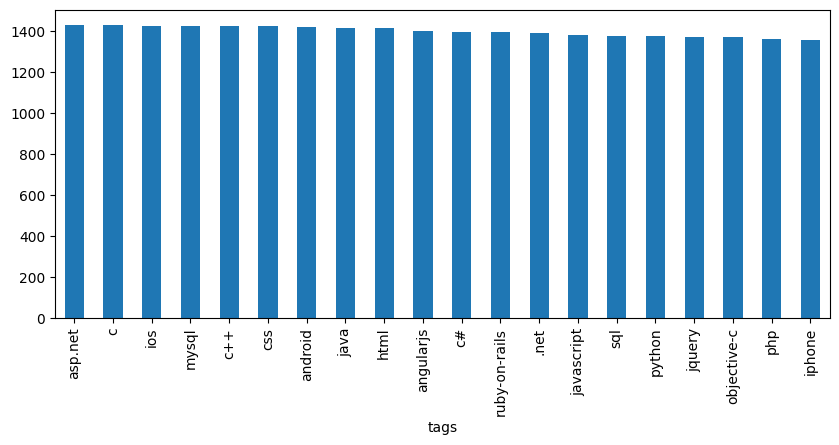

In [4]:
# Barplot of the count of tags
plt.figure(figsize=(10,4))
data.tags.value_counts().plot(kind='bar');
tags_unique = pd.unique(data["tags"])

Here is another way to visualize the number of posts by tag using a heatmap. Again we say the data is reasonably balanced.

In [12]:
class_data = data.groupby('tags').count()['post'].reset_index().sort_values(by='post',ascending=False)
class_data.style.background_gradient(cmap='winter')

,tags,post
3,asp.net,1433
4,c,1429
9,ios,1428
14,mysql,1425
6,c++,1424
7,css,1424
1,android,1422
11,java,1418
8,html,1415
2,angularjs,1403


Again, I will show class balance using a pie chart!

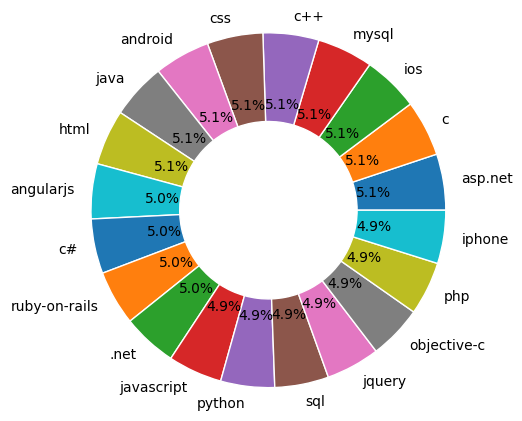

In [13]:
percent_class=class_df.post
labels= class_df.tags

pie,_,_ = plt.pie(percent_class,radius = 1.2,labels=labels,autopct="%.1f%%")

plt.setp(pie, width=0.6, edgecolor='white') 

plt.show()

Here we take a look at what a random post looks like : we see lots of useless words (to the model at least!) and other punctiation and numbers. We may want to remove these to help our models!

In [100]:
#example of data
print(data["post"][0])
print(data["tags"][0])

what is causing this behavior  in our c# datetime type  <pre><code>[test] public void sadness() {    var datetime = datetime.utcnow;    assert.that(datetime  is.equalto(datetime.parse(datetime.tostring()))); } </code></pre>   failed :   <pre><code> expected: 2011-10-31 06:12:44.000  but was:  2011-10-31 06:12:44.350 </code></pre>   i wish to know what is happening behind the scenes in tostring() etc to cause this behavior.    edit after seeing jon s answer :   <pre><code>[test] public void newsadness() {     var datetime = datetime.utcnow;     assert.that(datetime  is.equalto(datetime.parse(datetime.tostring( o )))); } </code></pre>   result :   <pre><code>expected: 2011-10-31 12:03:04.161 but was:  2011-10-31 06:33:04.161 </code></pre>   same result with capital and small  o  . i m reading up the docs  but still unclear.
c#


## Number of characters

Here we look look at some tags and see how many characters there are in the associated posts.It seems most about contain around 1000 to 2000 characters with the maximum reaching around 10000.

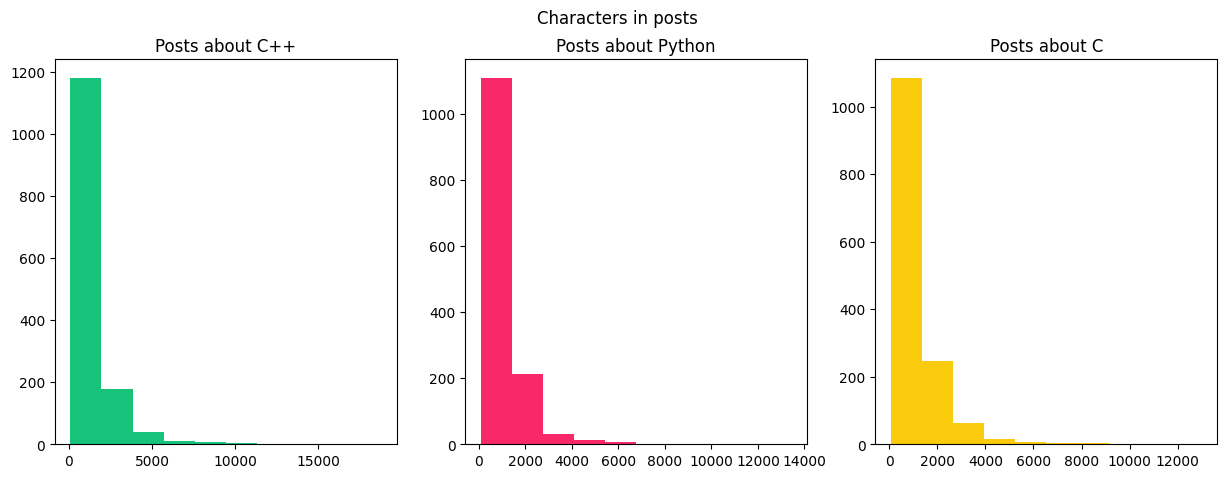

In [14]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

post_len=data[data['tags']=="c++"]['post'].str.len()
ax1.hist(post_len,color='#17C37B')
ax1.set_title('Posts about C++')

post_len=data[data['tags']=="python"]['post'].str.len()
ax2.hist(post_len,color='#F92969')
ax2.set_title('Posts about Python')

post_len=data[data['tags']=="c"]['post'].str.len()
ax3.hist(post_len,color='#FACA0C')
ax3.set_title('Posts about C')

fig.suptitle('Characters in posts')
plt.show()

## Number of Words

Next we can look at the average number of words in a post, again we will look at the same tags! Here we see on average there tends to be around 500 words for c++ and python but 2000 for C!

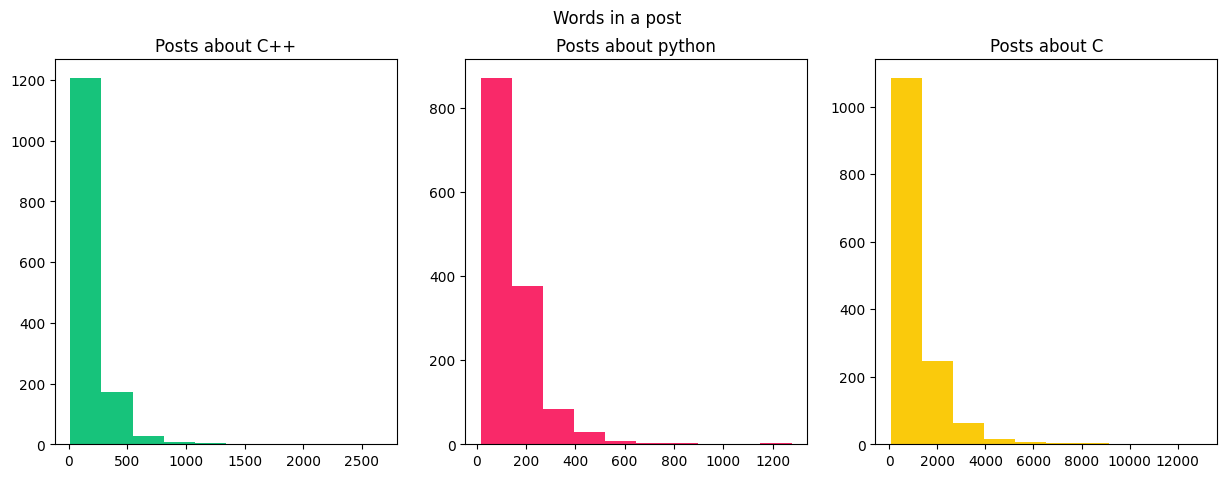

In [16]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

post_len=data[data['tags']=="c++"]['post'].str.split().map(lambda x: len(x))
ax1.hist(post_len,color='#17C37B')
ax1.set_title('Posts about C++')


post_len=data[data['tags']=="python"]['post'].str.split().map(lambda x: len(x))
ax2.hist(post_len,color='#F92969')
ax2.set_title('Posts about python')

post_len=data[data['tags']=="c"]['post'].str.split().map(lambda x: len(x))
ax3.hist(tweet_len,color='#FACA0C')
ax3.set_title('Posts about C')

fig.suptitle('Words in a post')
plt.show()

## Punctuation and common words

Here we will now look at the most common word and punctuation used ! This will help us to see how are data needs cleaning! 

In [18]:
def create_corpus(target):
    corpus=[]
    
    for x in data[data['tags']==target ]['post'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

<BarContainer object of 29 artists>

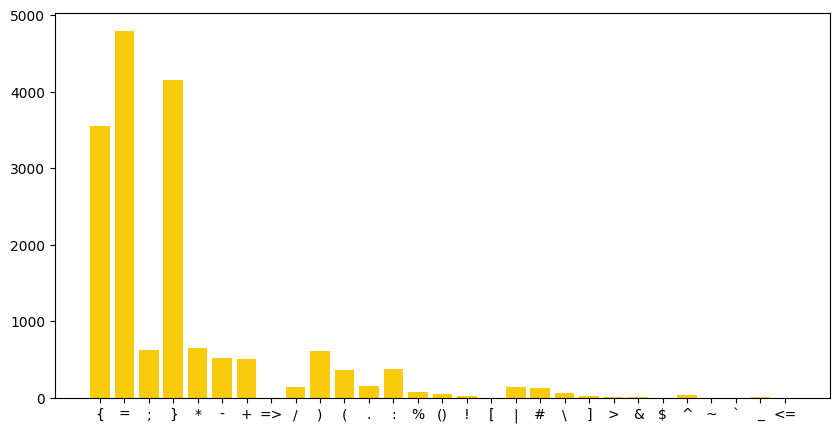

In [21]:
from collections import defaultdict

plt.figure(figsize=(10,5))
corpus=create_corpus("c")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

        
x,y=zip(*dic.items())
plt.bar(x,y,color='#FACA0C')

/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dty

<Axes: >

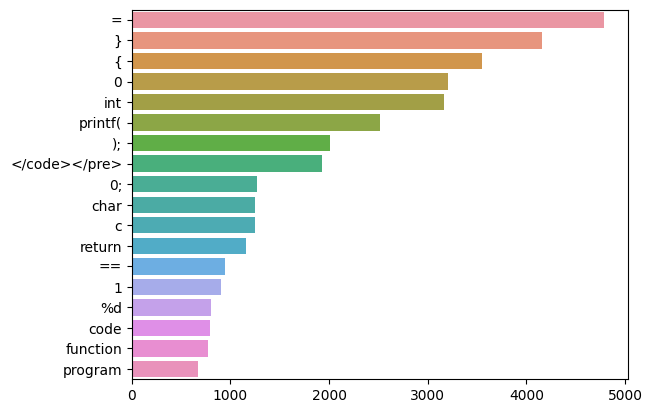

In [25]:
from collections import Counter
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

# Data Preprocessing

From our EDA it is clear our data needs extensive cleaning.
We observe that the post are in english and need to be preprocess before fitting them into a model.
We need to :
- remove the html formatting
- remove the unnecessary spaces
- remove the stopwords
- remove the undesirable characters
- remplace the capital letters by lower case lettersst are in english and need to be preprocess before fitting them into a model.



In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from bs4 import BeautifulSoup

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [5]:
# This is like the TA version but I left and not word.isdigit()
# Libra
replace_space = re.compile('[/(){}\[\]\|@,;]')
bad_symbols = re.compile('[^0-9a-z #+_]')
stopwords = set(stopwords.words('english'))

# function to formatting the text
def preprocess_text(text):
    
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = replace_space.sub(' ', text) # replace replace_space symbols by space in text
    text = bad_symbols.sub('', text) # delete symbols which are in bad_symbols from text
    text = ' '.join(word for word in text.split() if word not in stopwords and not word.isdigit()) # delete stopwords from text
    return text

In [6]:
# Apply preprocessing function

data["post"] = data["post"].apply(preprocess_text) # for some reason you have to do it twice

/var/folders/4c/3gx2xsy9345g1jn31zlztlww0000gn/T/ipykernel_47501/1360350800.py:10: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text # HTML decoding


Here is what our processed data now looks like 

In [35]:
data.post[0]

'causing behavior c# datetime type test public void sadness var datetime datetimeutcnow assertthat datetime isequalto datetimeparse datetimetostring failed expected wish know happening behind scenes tostring etc cause behavior edit seeing jon answer test public void newsadness var datetime datetimeutcnow assertthat datetime isequalto datetimeparse datetimetostring result expected result capital small reading docs still unclear'

# Model Implementation

In [7]:
from sklearn.feature_extraction.text import CountVectorizer # for transforming text into vector of count.

*CountVectorizer* transform an input of text into a sparse matrix of words count.
e.g:
"This is an example and this example is for a machine learning project"
|This|is |an |example|and|for|a  |machine|learning|project|
|----|---|---|-------|---|---|---|-------|--------|-------|
|2   |2  |1  |2      |1  |1  |1  |1      |1       |1      |

We now split our data into a train test split using 70% of the data for training and 30% as the test set.

In [207]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split # for illustration purpose; the test set is on Kaggle.

x_train, x_test, y_train, y_test = train_test_split(data["post"],  
                                                    data["tags"],  
                                                    test_size=0.3, shuffle = True)

## Support Vector Machine

Here I implemented the linear SVM using the LinearSVC library from Sklearn. We create our pipeline first applying the CountVectotrizer, followed by the TF-IDF transform before applying our linear SVC.

In [85]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import CountVectorizer
# Create the pipeline

svc_clf = Pipeline([("vect", CountVectorizer(token_pattern=r"(?u)\b\w\w+\b|\.|\s")) ,
                        ("tfidf", TfidfTransformer()),
                       ("lin_svc", LinearSVC())])

svc_clf.fit(x_train, y_train)
print(svc_clf.score(x_train, y_train))
print(svc_clf.score(x_test, y_test))

/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


0.984030612244898
0.8041666666666667


Here we can have a look at the plot for the training curve of our Linear Support Vector Machine.

/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.wa

/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.wa

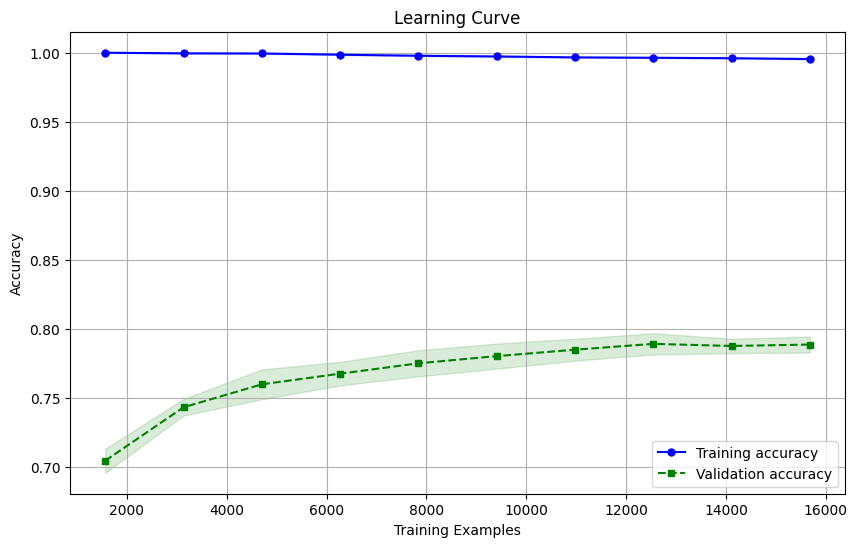

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores = learning_curve(
    svc_clf, x_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


This model appears to perform reasonably. We know will use grid search to try and improve our LinearSVC hyper parameters

In [86]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

svc_clf = Pipeline([("vect", CountVectorizer(token_pattern= '(\S+)', ngram_range = (1,2), max_df = 0.38)) ,
                        ("tfidf", TfidfTransformer(sublinear_tf = True, use_idf = True)),
                       ("lin_svc", LinearSVC(C = 0.92, dual = "auto", loss = "squared_hinge", tol=1e-4))])

# Gridsearch to determine the value of C
param_grid = {#'vect__ngram_range': [(1, 1), (1, 2)],
              'vect__token_pattern':[r"(?u)\b\w\w+\b|\.|\s",'(\S+)'],
              #'vect__max_df': np.arange(0.3,0.4,0.01),
              #'tfidf__sublinear_tf': [True, False],
              'lin_svc__C':np.arange(0.9,1,0.01),
              #'lin_svc__C': [0.94, 0.93, 0.92, 0.95]
              #'lin_svc__loss' :("squared_hinge", "hinge"),
              #'lin_svc__tol' :[1e-4,1e-5],
             }
linearSVC = GridSearchCV(svc_clf,param_grid,cv=5,return_train_score=True)
linearSVC.fit(x_train,y_train)

print(linearSVC.best_params_)


bestlinearSVC = linearSVC.best_estimator_
bestlinearSVC.fit(data["post"],data["tags"])
bestlinearSVC.score(x_train,y_train)
bestlinearSVC.score(x_test,y_test)

{'lin_svc__C': 0.92, 'vect__token_pattern': '(\\S+)'}


1.0

Here I am plotting the evolution of the models accuracy dependant on the value of C and token_pattern.

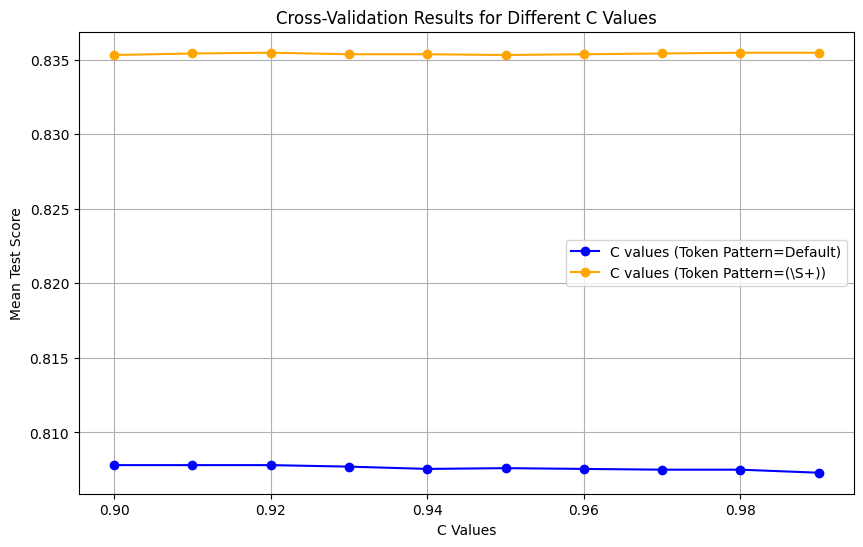

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# Extracting relevant results from the GridSearchCV object
results_df = pd.DataFrame(linearSVC.cv_results_)
token_none_results = results_df[results_df['param_vect__token_pattern'] == r"(?u)\b\w\w+\b|\.|\s"]
token_s_results = results_df[results_df['param_vect__token_pattern'] == '(\S+)']

# Plotting C values for token_pattern=None and Token Pattern=(\S+)
plt.figure(figsize=(10, 6))
plt.plot(token_none_results['param_lin_svc__C'], token_none_results['mean_test_score'], label='C values (Token Pattern=Default)', marker='o', color='blue')
plt.plot(token_s_results['param_lin_svc__C'], token_s_results['mean_test_score'], label='C values (Token Pattern=(\S+))', marker='o', color='orange')

# Adding labels and title
plt.title('Cross-Validation Results for Different C Values')
plt.xlabel('C Values')
plt.ylabel('Mean Test Score')
plt.legend()
plt.grid(True)
plt.show()


Here I will retrain our model using the best coefficients given by the gridsearch, I have done this as rerunning the gridsearch can take several hours each time:

- **Vectorizer:** CountVectorizer
    - Token Pattern: (\S+)
    - N-gram Range: (1,2)
    - Max Document Frequency (\(max\_df\)): 0.39
- **Transformer:** TfidfTransformer
    - Sublinear TF: True
    - Use IDF: True
- **Classifier:** LinearSVC
    - C: 0.92
    - Dual: Auto
    - Loss: Squared Hinge
    - Tolerance (\(tol\)): \(1 \times 10^{-4}\)


In [283]:
best_svc_clf = Pipeline([("vect", CountVectorizer(token_pattern= '(\S+)',ngram_range = (1,2), max_df = 0.39)) ,
                        ("tfidf", TfidfTransformer(sublinear_tf = True, use_idf = True)),
                       ("lin_svc", LinearSVC(C = 0.92, dual = "auto", loss = "squared_hinge", tol=1e-4))])

best_svc_clf.fit(x_train, y_train)
print(best_svc_clf.score(x_train, y_train))
print(best_svc_clf.score(x_test, y_test))

0.9998979591836735
0.8326190476190476


Here for the final submission, we will retrain our model using the entire dataset using th best coefficients found using our gridsearch. I have done this in the interest of time so as to not need to rerun the GridSearch everytime!

In [61]:
best_svc_clf = Pipeline([("vect", CountVectorizer(token_pattern= '(\S+)',ngram_range = (1,2), max_df = 0.39)) ,
                        ("tfidf", TfidfTransformer(sublinear_tf = True, use_idf = True)),
                       ("lin_svc", LinearSVC(C = 0.92, dual = "auto", loss = "squared_hinge", tol=1e-4))])

best_svc_clf.fit(data["post"], data["tags"])
print(best_svc_clf.score(x_train, y_train))
print(best_svc_clf.score(x_test, y_test))

0.9997448979591836
1.0


I will now perform a 5-fold cross validation on our best model.

In [110]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_svc_clf,data["post"] , data["tags"], cv=5)

In [113]:
import numpy as np

# Array of values
accuracy_values = scores

# Calculate mean, median, min, max, 1st quantile, and 3rd quantile
mean_value = np.mean(accuracy_values)
median_value = np.median(accuracy_values)
min_value = np.min(accuracy_values)
max_value = np.max(accuracy_values)
quantile_25 = np.percentile(accuracy_values, 25)
quantile_75 = np.percentile(accuracy_values, 75)

# Display the results in a table
print("Accuracy Statistics:")
print("---------------------")
print(f"Mean       : {mean_value:.4f}")
print(f"Median     : {median_value:.4f}")
print(f"Min        : {min_value:.4f}")
print(f"Max        : {max_value:.4f}")
print(f"1st Quantile: {quantile_25:.4f}")
print(f"3rd Quantile: {quantile_75:.4f}")


Accuracy Statistics:
---------------------
Mean       : 0.8397
Median     : 0.8391
Min        : 0.8346
Max        : 0.8473
1st Quantile: 0.8375
3rd Quantile: 0.8400


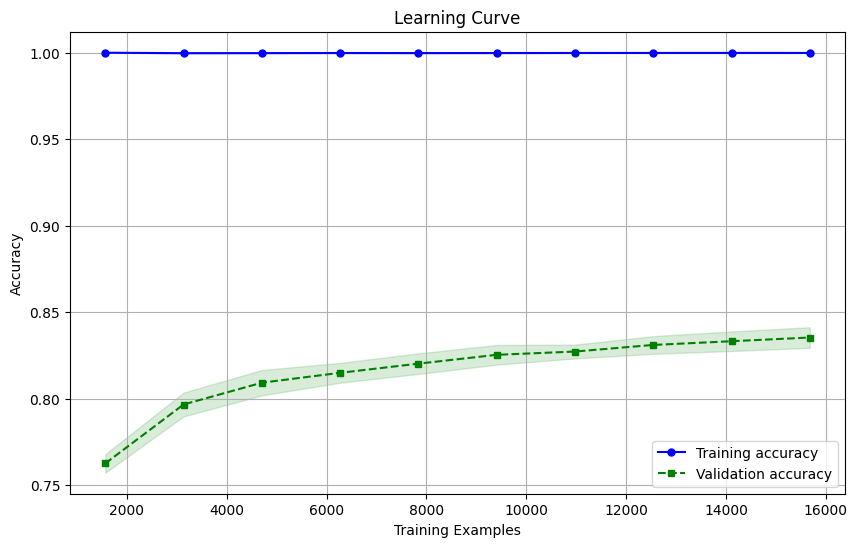

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores = learning_curve(
    best_svc_clf, x_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


We now look at the most common missclassifications.

/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dty

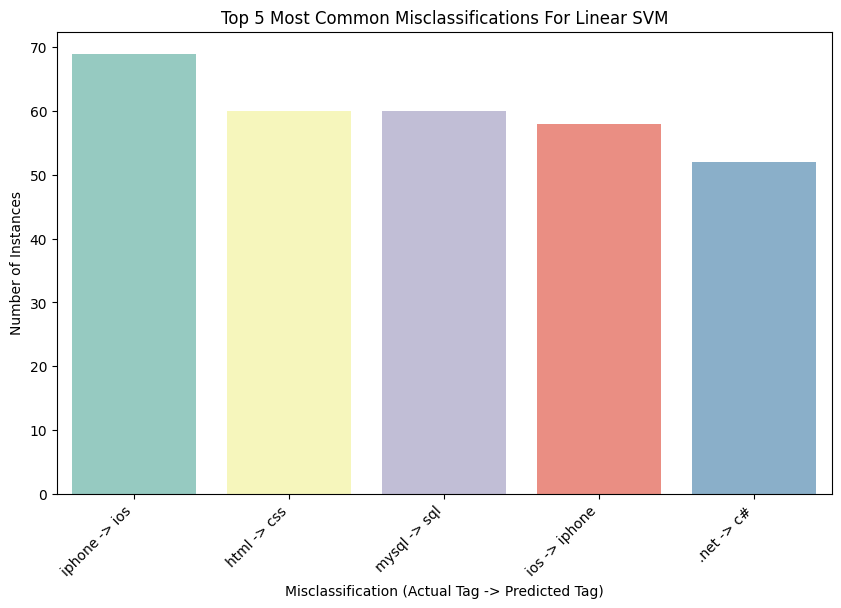

In [397]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions on the test set
y_pred = best_svc_clf.predict(x_test)

# Collecting incorrect predictions
incorrect_predictions = [(x_test.iloc[i], y_test.iloc[i], y_pred[i]) for i in range(len(y_test)) if y_pred[i] != y_test.iloc[i]]

# Counting the occurrences of each misclassification
misclassification_counts = Counter((true_label, pred_label) for _, true_label, pred_label in incorrect_predictions)

# Get the top N most common misclassifications
top_n = 5  # Replace with the desired number of top misclassifications
top_misclassifications = misclassification_counts.most_common(top_n)

# Plotting the top N most common misclassifications
plt.figure(figsize=(10, 6))
sns.barplot(x=[f"{true_label} -> {pred_label}" for (true_label, pred_label), count in top_misclassifications],
            y=[count for _, count in top_misclassifications], palette="Set3")
plt.title(f"Top {top_n} Most Common Misclassifications For Linear SVM")
plt.xlabel("Misclassification (Actual Tag -> Predicted Tag)")
plt.ylabel("Number of Instances")
plt.xticks(rotation=45, ha="right")
plt.show()


Next we look at how the model classifies a certain post. Here we look at the decison function of our SVM, we see that the model incorrectly predicted the tag as javascript when in fact it was css, looking at the decision function we see both scores were very close. This could be due to the post containing the word javascript which could have swinged it.

In [338]:
from operator import itemgetter

test_vec = TfidfVectorizer(token_pattern = '(\S+)', ngram_range = (1,1), sublinear_tf = True, max_df = 0.4)
test_vec.fit_transform(x_test)

example_index = 1  # Change this to the index 

# Get the text of the selected example
example_text = x_test.iloc[example_index]

# Transform the example using the TF-IDF vectorizer
example_tfidf = test_vec.transform([example_text])

# Get feature names (words) from the TF-IDF vectorizer
feature_names = test_vec.get_feature_names_out()

# Convert the TF-IDF matrix to a dense array for better visibility
dense_array = example_tfidf.toarray()[0]

# Get the indices of the top 5 features with the highest TF-IDF values
top5_indices = sorted(enumerate(dense_array), key=itemgetter(1), reverse=True)[:10]

# Print the TF-IDF values for the selected example
print(f"Example - Text: {example_text}\n")

# Display the top 5 features and their corresponding TF-IDF values
for feature_index, tfidf_value in top5_indices:
    print(f"{feature_names[feature_index]}: {tfidf_value}")

Example - Text: fit iframe content page remove inner scrollbars hello app top menu sidebar iframe nested table know old school wasnt decision want iframe fill page based content length eliminate iframe scrollbar use browser scrollbar scroll use javascript set everything height specific overflow rule right min height iframe 700px height

iframe: 0.43788297692865835
scrollbar: 0.3009206526778889
height: 0.22509979871073546
wasnt: 0.21164935992528128
scrollbars: 0.20618933470850917
700px: 0.19795630764644262
decision: 0.18476778183684658
eliminate: 0.18476778183684658
sidebar: 0.17624518137326836
content: 0.17541010420891776


In [332]:
# Choose an example post index
test_vec = TfidfVectorizer(token_pattern = '(\S+)', ngram_range = (1,1), sublinear_tf = True, max_df = 0.4)
test_vec.fit_transform(x_test)

example_index = 1 # Change this to the index of the post you're interested in

# Get the text of the selected example
example_text = x_test.iloc[example_index]

# Transform the example using the pipeline
example_tfidf = test_vec.transform([example_text])

# Get the decision function scores for each class
decision_scores = best_svc_clf.decision_function(x_test)[example_index,:]

# Get the predicted class for the example
predicted_class = best_svc_clf.predict([example_text])[0]

# Display the information
print(f"Example - Text: {example_text}")
print(f"Predicted Class: {predicted_class}")
print(f"Correct Class: {y_test.iloc[example_index]}")
print("Decision Function Scores:")
for class_idx, score in enumerate(decision_scores):
    print(f"Class {best_svc_clf.classes_[class_idx]}: {score}")


Example - Text: fit iframe content page remove inner scrollbars hello app top menu sidebar iframe nested table know old school wasnt decision want iframe fill page based content length eliminate iframe scrollbar use browser scrollbar scroll use javascript set everything height specific overflow rule right min height iframe 700px height
Predicted Class: javascript
Correct Class: css
Decision Function Scores:
Class .net: -1.1761449300687437
Class android: -0.990603072840283
Class angularjs: -1.0723913346574463
Class asp.net: -0.8552748015837845
Class c: -1.13629282723248
Class c#: -1.3010304891707984
Class c++: -1.2310692720389689
Class css: -0.3509381579768971
Class html: -0.4079388294793013
Class ios: -0.9402629103779155
Class iphone: -1.2229907313052004
Class java: -1.1555949455726435
Class javascript: 0.00904117157576445
Class jquery: -1.350744026353857
Class mysql: -1.04013353329699
Class objective-c: -1.1823849103240138
Class php: -1.2890582092780407
Class python: -1.15011520364140

## Logistic Regression

We will now look at the Logistic Regression

In [224]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the pipeline
pipe_logistic = Pipeline([
    ("tfidf", TfidfVectorizer()),  # Vectorizing text data
    ("logistic", LogisticRegression(penalty=None, solver="saga", tol=0.1, random_state=10))
])

In [225]:
from sklearn.metrics import accuracy_score 
import numpy as np


# Fit the pipeline to the training data
pipe_logistic.fit(x_train, y_train)

# Predict on the training data
y_train_pred = pipe_logistic.predict(x_train)
# Calculate accuracy on the training data
train_acc = accuracy_score(y_train, y_train_pred)
print("Logistic --- Accuracy on training:", train_acc)

# Predict on the test data
y_test_pred = pipe_logistic.predict(x_test)
# Calculate accuracy on the test data
test_acc = accuracy_score(y_test, y_test_pred)
print("Logistic --- Accuracy on test:", np.round(test_acc, 3))

Logistic --- Accuracy on training: 0.9526020408163265
Logistic --- Accuracy on test: 0.771


In [373]:
# Gridsearch to determine the value of C

pipe_logistic = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range = (1,1), token_pattern = '(\S+)')),  # Vectorizing text data
    ("logistic", LogisticRegression(penalty="l2", solver="saga", random_state=10))
])

param_grid = {#'tfidf__ngram_range': [(1, 1), (1, 2)],
              #'tfidf__token_pattern': [r"(?u)\b\w\w+\b|\.|\s",'(\S+)'],
              'logistic__C':[0.9, 0.95, 0.98],
              'logistic__solver':["saga", "liblinear"],
              
             }
tune_log = GridSearchCV(pipe_logistic,param_grid,cv=5,return_train_score=True)
tune_log.fit(x_train,y_train)

print(tune_log.best_params_)

{'logistic__C': 0.98, 'logistic__solver': 'liblinear'}


/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert 

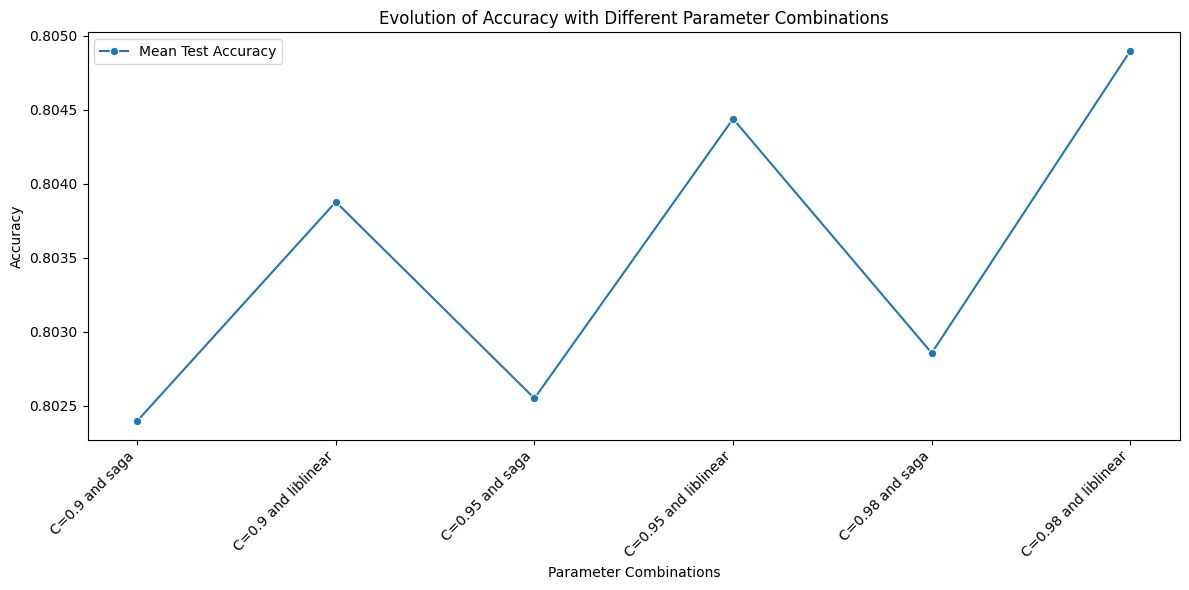

In [375]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Extract the relevant information from cv_results_
mean_train_scores = tune_log.cv_results_['mean_train_score']
mean_test_scores = tune_log.cv_results_['mean_test_score']
param_values = tune_log.cv_results_['params']

# Create a DataFrame for easy plotting
results_df = pd.DataFrame({'Mean Train Accuracy': mean_train_scores,
                           'Mean Test Accuracy': mean_test_scores,
                           'Parameter Combinations': ["C=0.9 and saga","C=0.9 and liblinear","C=0.95 and saga","C=0.95 and liblinear"
                                                     ,"C=0.98 and saga","C=0.98 and liblinear"]})
param_values
# Plot the evolution of accuracy using Seaborn
plt.figure(figsize=(12, 6))
#sns.lineplot(data=results_df, x='Parameter Combinations', y='Mean Train Accuracy', marker='o', label='Mean Train Accuracy')
sns.lineplot(data=results_df, x='Parameter Combinations', y='Mean Test Accuracy', marker='o', label='Mean Test Accuracy')

# Set labels and title
plt.xlabel('Parameter Combinations')
plt.ylabel('Accuracy')
plt.title('Evolution of Accuracy with Different Parameter Combinations')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

Once again I will rewrite our best model using the parameters given by this gridsearch :

- **Vectorizer:** TfidfVectorizer
    - Token Pattern: (\S+)
    - N-gram Range: (1,1)
    - Sublinear TF: True
    - Max Document Frequency (\(max\_df\)): 0.4
- **Classifier:** LogisticRegression
    - C: 0.95
    - Solver: liblinear
    - Penalty: L2


In [282]:
# Define the pipeline
best_pipe_logistic = Pipeline([
    ("tfidf", TfidfVectorizer(token_pattern = '(\S+)', ngram_range = (1,1), sublinear_tf = True, max_df = 0.4)),  # Vectorizing text data
    ("logistic", LogisticRegression(C = 0.95, solver = "liblinear",penalty="l2"))
])

best_pipe_logistic.fit(x_train, y_train)
print(best_pipe_logistic.score(x_train, y_train))
print(best_pipe_logistic.score(x_test, y_test))


0.920765306122449
0.8204761904761905


In [451]:
import numpy as np

# Array of values
accuracy_values =cross_val_score(best_pipe_logistic,data["post"] , data["tags"], cv=5)

# Calculate mean, median, min, max, 1st quantile, and 3rd quantile
mean_value = np.mean(accuracy_values)
median_value = np.median(accuracy_values)
min_value = np.min(accuracy_values)
max_value = np.max(accuracy_values)
quantile_25 = np.percentile(accuracy_values, 25)
quantile_75 = np.percentile(accuracy_values, 75)

# Display the results in a table
print("Accuracy Statistics:")
print("---------------------")
print(f"Mean       : {mean_value:.4f}")
print(f"Median     : {median_value:.4f}")
print(f"Min        : {min_value:.4f}")
print(f"Max        : {max_value:.4f}")
print(f"1st Quantile: {quantile_25:.4f}")
print(f"3rd Quantile: {quantile_75:.4f}")


Accuracy Statistics:
---------------------
Mean       : 0.8311
Median     : 0.8332
Min        : 0.8255
Max        : 0.8363
1st Quantile: 0.8264
3rd Quantile: 0.8339


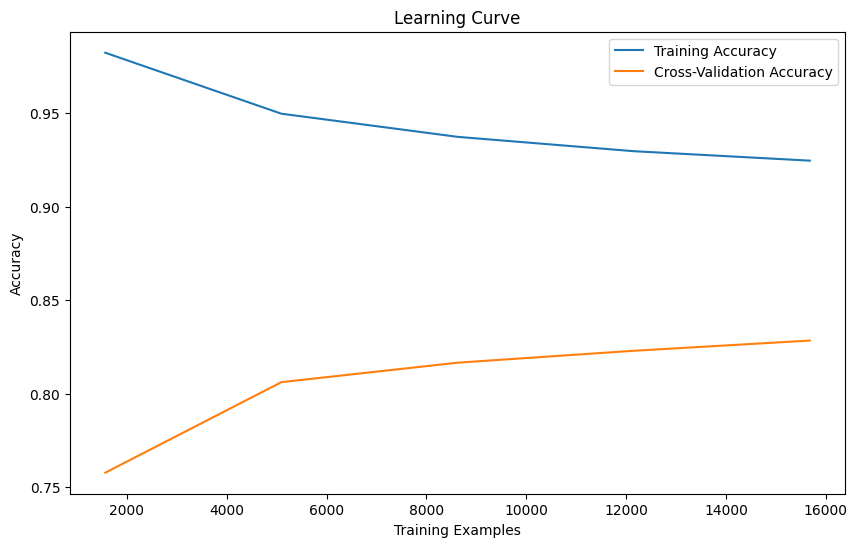

In [281]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_pipe_logistic, x_train, y_train, cv=5, scoring='accuracy')

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Accuracy')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()


In the following plot, we look at what were the most common missclassifications.

/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dty

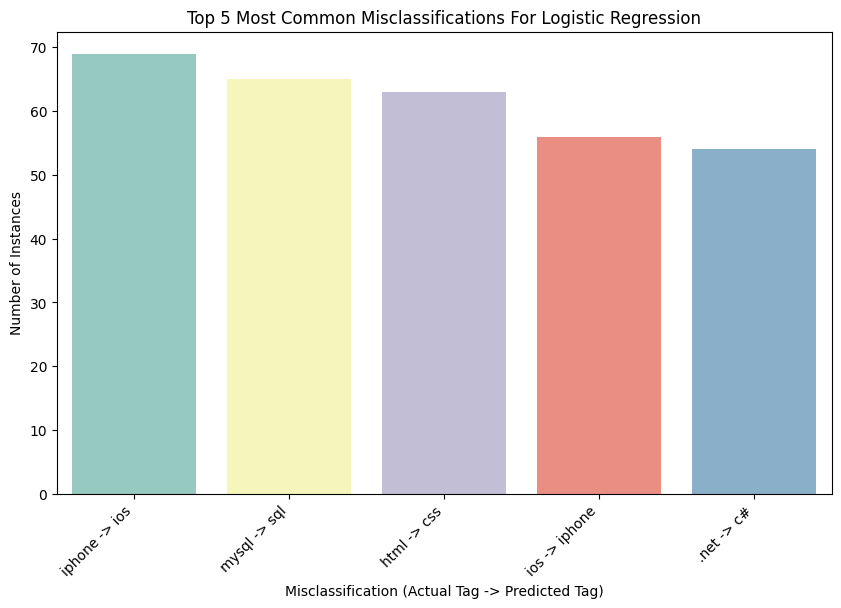

In [398]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions on the test set
y_pred = best_pipe_logistic.predict(x_test)

# Collecting incorrect predictions
incorrect_predictions = [(x_test.iloc[i], y_test.iloc[i], y_pred[i]) for i in range(len(y_test)) if y_pred[i] != y_test.iloc[i]]

# Counting the occurrences of each misclassification
misclassification_counts = Counter((true_label, pred_label) for _, true_label, pred_label in incorrect_predictions)

# Get the top N most common misclassifications
top_n = 5  # Replace with the desired number of top misclassifications
top_misclassifications = misclassification_counts.most_common(top_n)

# Plotting the top N most common misclassifications
plt.figure(figsize=(10, 6))
sns.barplot(x=[f"{true_label} -> {pred_label}" for (true_label, pred_label), count in top_misclassifications],
            y=[count for _, count in top_misclassifications], palette="Set3")
plt.title(f"Top {top_n} Most Common Misclassifications For Logistic Regression")
plt.xlabel("Misclassification (Actual Tag -> Predicted Tag)")
plt.ylabel("Number of Instances")
plt.xticks(rotation=45, ha="right")
plt.show()


We will now look to see how the model predicted a post :

In [280]:
# Choose a specific post index for inspection
post_index = 0  # Replace with the index of the post you want to inspect

# Get the text of the selected post
selected_post = x_test.iloc[post_index]

# Get the true label for the selected post
true_label = y_test.iloc[post_index]

# Use the model to predict the label for the selected post
predicted_label = best_pipe_logistic.predict([selected_post])[0]

# Display the results
print("Selected Post:")
print(selected_post)
print("\nTrue Label:", true_label)
print("Predicted Label:", predicted_label)


Selected Post:
clean python environment app creates python code runs process two method assignments like clear create error second run push writerpush def apppush self push self dumprow self writerpushapppush legacy code fix run python announces recursion looking way clear environment ossystem cls help clean assignments thanks edit legacy code familiar yet app creates python code contains general stuff like bit posted translation user workflow python user creates flow ends calling apppush application restarted run add stuff code looking way clear interpreter environment assignment possible

True Label: python
Predicted Label: python


In [290]:
from operator import itemgetter

test_vec = TfidfVectorizer(token_pattern = '(\S+)', ngram_range = (1,1), sublinear_tf = True, max_df = 0.4)
test_vec.fit_transform(x_test)

# Choose an example post index
example_index = 0  # Change this to the index

# Get the text of the selected example
example_text = x_test.iloc[example_index]

# Transform the example using the TF-IDF vectorizer
example_tfidf = test_vec.transform([example_text])

# Get feature names (words) from the TF-IDF vectorizer
feature_names = test_vec.get_feature_names_out()

# Convert the TF-IDF matrix to a dense array for better visibility
dense_array = example_tfidf.toarray()[0]

# Get the indices of the top 5 features with the highest TF-IDF values
top5_indices = sorted(enumerate(dense_array), key=itemgetter(1), reverse=True)[:10]

# Print the TF-IDF values for the selected example
print(f"Example - Text: {example_text}\n")

# Display the top 5 features and their corresponding TF-IDF values
for feature_index, tfidf_value in top5_indices:
    print(f"{feature_names[feature_index]}: {tfidf_value}")


Example - Text: clean python environment app creates python code runs process two method assignments like clear create error second run push writerpush def apppush self push self dumprow self writerpushapppush legacy code fix run python announces recursion looking way clear environment ossystem cls help clean assignments thanks edit legacy code familiar yet app creates python code contains general stuff like bit posted translation user workflow python user creates flow ends calling apppush application restarted run add stuff code looking way clear interpreter environment assignment possible

apppush: 0.2820287363212853
assignments: 0.23344586785625407
environment: 0.2291329228178283
legacy: 0.2279422667893051
creates: 0.21497370153767048
python: 0.20186084504907628
clear: 0.19796957947998328
clean: 0.19740584556330543
self: 0.17689234635941636
push: 0.1747061699244803


In [341]:
# Choose an example post index
test_vec = TfidfVectorizer(token_pattern = '(\S+)', ngram_range = (1,1), sublinear_tf = True, max_df = 0.4)
test_vec.fit_transform(x_test)

example_index = 0 # Change this to the index of the post 

# Get the text of the selected example
example_text = x_test.iloc[example_index]

# Transform the example using the pipeline
example_tfidf = test_vec.transform([example_text])

# Get the decision function scores for each class
decision_scores = best_pipe_logistic.decision_function(x_test)[example_index,:]

# Get the predicted class for the example
predicted_class = best_pipe_logistic.predict([example_text])[0]

# Display the information
print(f"Example - Text: {example_text}")
print(f"Predicted Class: {predicted_class}")
print(f"Correct Class: {y_test.iloc[example_index]}")
print("Decision Function Scores:")
for class_idx, score in enumerate(decision_scores):
    print(f"Class {best_svc_clf.classes_[class_idx]}: {score}")


Example - Text: clean python environment app creates python code runs process two method assignments like clear create error second run push writerpush def apppush self push self dumprow self writerpushapppush legacy code fix run python announces recursion looking way clear environment ossystem cls help clean assignments thanks edit legacy code familiar yet app creates python code contains general stuff like bit posted translation user workflow python user creates flow ends calling apppush application restarted run add stuff code looking way clear interpreter environment assignment possible
Predicted Class: python
Correct Class: python
Decision Function Scores:
Class .net: -3.686216925028444
Class android: -3.6465434745158403
Class angularjs: -4.3593853788423385
Class asp.net: -4.262941884149227
Class c: -4.968623539307314
Class c#: -4.6509240378010706
Class c++: -4.4652556949464435
Class css: -4.942971420330789
Class html: -5.0086161432912375
Class ios: -2.481265148423628
Class iphone

In summary, TF-IDF transforms the text data into a numerical format, highlighting the importance of words in the context of a specific document and the entire dataset. Logistic regression then utilizes these TF-IDF values to learn the relationships between features and make predictions on whether a given example belongs to a particular class. We see here the top 10 features and their corresponding td-idf values. 

## Random Forrest

In [348]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split



# Define the pipeline for RandomForestClassifier
pipe_rf = Pipeline([
    ("tfidf", TfidfVectorizer()),  # Vectorizing text data
    ("random_forest", RandomForestClassifier(n_estimators=100, random_state=10))
])

# Fit the pipeline on the training data
pipe_rf.fit(x_train, y_train)

# Print the training and testing accuracy
print("Training Accuracy:", pipe_rf.score(x_train, y_train))
print("Testing Accuracy:", pipe_rf.score(x_test, y_test))


Training Accuracy: 0.9999489795918367
Testing Accuracy: 0.773452380952381


In [345]:
# Gridsearch to determine the value of C
best_pipe_rf = Pipeline([
    ("tfidf", TfidfVectorizer(token_pattern='(\S+)', ngram_range=(1, 1))),  # Vectorizing text data
    ("random_forest", RandomForestClassifier(n_estimators=100, random_state=10))
])

param_grid = {#'tfidf__ngram_range': [(1, 1), (1, 2)],
              #'tfidf__token_pattern': [r"(?u)\b\w\w+\b|\.|\s",'(\S+)'],
              #'random_forest__n_estimators':[500, 1000],
              'random_forest__max_features':['sqrt', 'log2'],
            'random_forest__criterion':['gini', 'entropy', 'log_loss']
             }
tune_rf = GridSearchCV(best_pipe_rf,param_grid,cv=5,return_train_score=True)
tune_rf.fit(x_train,y_train)

print(tune_rf.best_params_)

{'random_forest__criterion': 'gini', 'random_forest__max_features': 'sqrt'}


/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert 

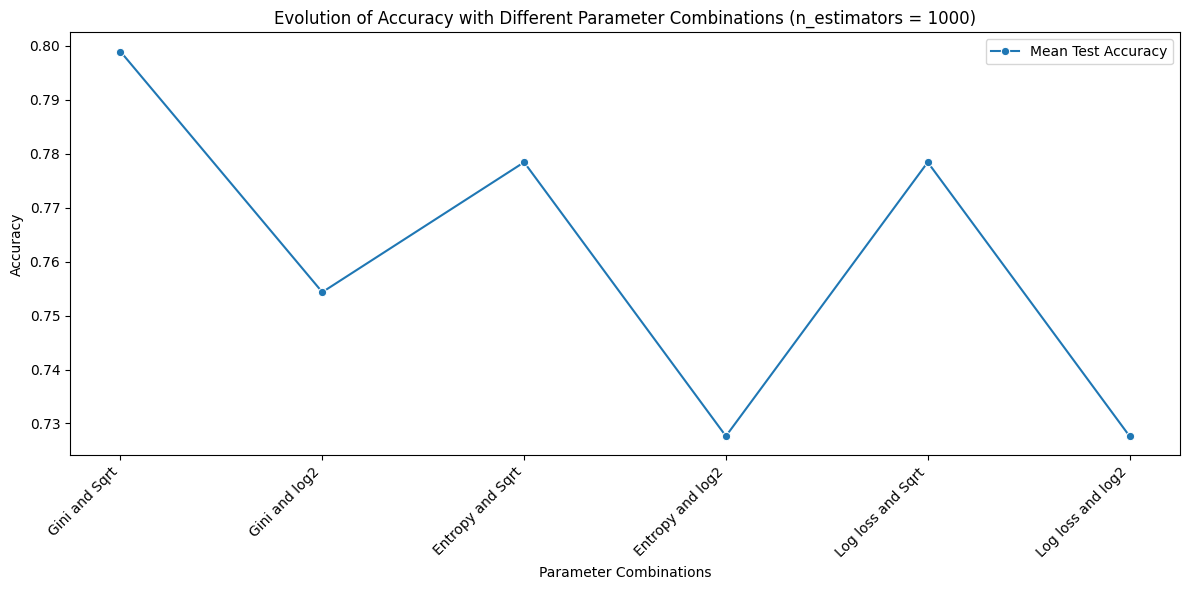

In [370]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Extract the relevant information from cv_results_
mean_train_scores = tune_rf.cv_results_['mean_train_score']
mean_test_scores = tune_rf.cv_results_['mean_test_score']
param_values = tune_rf.cv_results_['params']

# Create a DataFrame for easy plotting
results_df = pd.DataFrame({'Mean Train Accuracy': mean_train_scores,
                           'Mean Test Accuracy': mean_test_scores,
                           'Parameter Combinations': ["Gini and Sqrt", "Gini and log2", "Entropy and Sqrt", "Entropy and log2",
                                                     "Log loss and Sqrt", "Log loss and log2"]})
param_values
# Plot the evolution of accuracy using Seaborn
plt.figure(figsize=(12, 6))
#sns.lineplot(data=results_df, x='Parameter Combinations', y='Mean Train Accuracy', marker='o', label='Mean Train Accuracy')
sns.lineplot(data=results_df, x='Parameter Combinations', y='Mean Test Accuracy', marker='o', label='Mean Test Accuracy')

# Set labels and title
plt.xlabel('Parameter Combinations')
plt.ylabel('Accuracy')
plt.title('Evolution of Accuracy with Different Parameter Combinations (n_estimators = 1000)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


I refit the model using the best parameters.

In [357]:
# Define the pipeline for RandomForestClassifier
best_pipe_rf = Pipeline([
    ("tfidf", TfidfVectorizer(token_pattern='(\S+)', ngram_range=(1, 1))),  # Vectorizing text data
    ("random_forest", RandomForestClassifier(n_estimators=1000, criterion = "gini", max_features = "sqrt",random_state=10))
])

# Fit the pipeline on the training data
best_pipe_rf.fit(x_train, y_train)

# Print the training and testing accuracy
print("Training Accuracy:", best_pipe_rf.score(x_train, y_train))
print("Testing Accuracy:", best_pipe_rf.score(x_test, y_test))


Training Accuracy: 0.9999489795918367
Testing Accuracy: 0.8070238095238095


In [452]:
import numpy as np

# Array of values
accuracy_values =cross_val_score(best_pipe_rf,data["post"] , data["tags"], cv=5)

# Calculate mean, median, min, max, 1st quantile, and 3rd quantile
mean_value = np.mean(accuracy_values)
median_value = np.median(accuracy_values)
min_value = np.min(accuracy_values)
max_value = np.max(accuracy_values)
quantile_25 = np.percentile(accuracy_values, 25)
quantile_75 = np.percentile(accuracy_values, 75)

# Display the results in a table
print("Accuracy Statistics:")
print("---------------------")
print(f"Mean       : {mean_value:.4f}")
print(f"Median     : {median_value:.4f}")
print(f"Min        : {min_value:.4f}")
print(f"Max        : {max_value:.4f}")
print(f"1st Quantile: {quantile_25:.4f}")
print(f"3rd Quantile: {quantile_75:.4f}")

Accuracy Statistics:
---------------------
Mean       : 0.8185
Median     : 0.8204
Min        : 0.8111
Max        : 0.8220
1st Quantile: 0.8186
3rd Quantile: 0.8205


/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dty

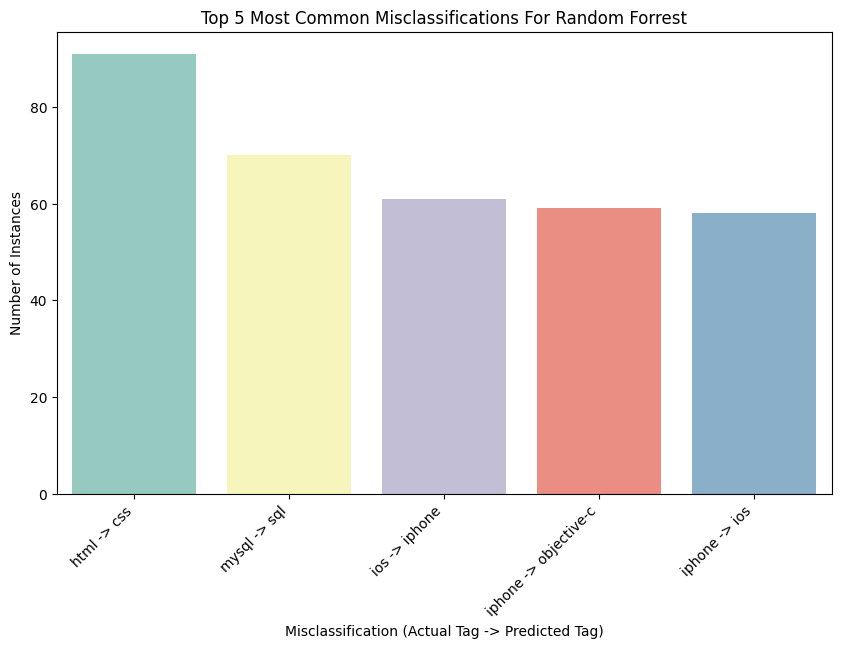

In [399]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions on the test set
y_pred = best_pipe_rf.predict(x_test)

# Collecting incorrect predictions
incorrect_predictions = [(x_test.iloc[i], y_test.iloc[i], y_pred[i]) for i in range(len(y_test)) if y_pred[i] != y_test.iloc[i]]

# Counting the occurrences of each misclassification
misclassification_counts = Counter((true_label, pred_label) for _, true_label, pred_label in incorrect_predictions)

# Get the top N most common misclassifications
top_n = 5  # Replace with the desired number of top misclassifications
top_misclassifications = misclassification_counts.most_common(top_n)

# Plotting the top N most common misclassifications
plt.figure(figsize=(10, 6))
sns.barplot(x=[f"{true_label} -> {pred_label}" for (true_label, pred_label), count in top_misclassifications],
            y=[count for _, count in top_misclassifications], palette="Set3")
plt.title(f"Top {top_n} Most Common Misclassifications For Random Forrest")
plt.xlabel("Misclassification (Actual Tag -> Predicted Tag)")
plt.ylabel("Number of Instances")
plt.xticks(rotation=45, ha="right")
plt.show()


In [384]:
from operator import itemgetter

test_vec = TfidfVectorizer(token_pattern = '(\S+)', ngram_range = (1,1), sublinear_tf = True, max_df = 0.4)
test_vec.fit_transform(x_test)

# Choose an example post index
example_index = 303 # Change this to the index of the post

# Get the text of the selected example
example_text = x_test.iloc[example_index]

# Transform the example using the TF-IDF vectorizer
example_tfidf = test_vec.transform([example_text])

# Get feature names (words) from the TF-IDF vectorizer
feature_names = test_vec.get_feature_names_out()

# Convert the TF-IDF matrix to a dense array for better visibility
dense_array = example_tfidf.toarray()[0]

# Get the indices of the top 5 features with the highest TF-IDF values
top5_indices = sorted(enumerate(dense_array), key=itemgetter(1), reverse=True)[:10]

# Print the TF-IDF values for the selected example
print(f"Example - Text: {example_text}\n")

# Display the top 5 features and their corresponding TF-IDF values
for feature_index, tfidf_value in top5_indices:
    print(f"{feature_names[feature_index]}: {tfidf_value}")


Example - Text: could reason error please see detail showing image error keep getting error uploadingi idea error resolve themmy build successful warnings application tested ios 41any help highly appreciated thanks

41any: 0.32893508684438505
themmy: 0.32893508684438505
uploadingi: 0.32893508684438505
warnings: 0.24967445050984252
error: 0.24360785566742343
highly: 0.24001242489529076
successful: 0.23132128726730372
detail: 0.23023791759993945
tested: 0.22091895668423764
resolve: 0.20583446770566913


In [383]:
# Choose an example post index
test_vec = TfidfVectorizer(token_pattern = '(\S+)', ngram_range = (1,1), sublinear_tf = True, max_df = 0.4)
test_vec.fit_transform(x_test)

example_index = 303 # Change this to the index

# Get the text of the selected example
example_text = x_test.iloc[example_index]

# Transform the example using the pipeline
example_tfidf = test_vec.transform([example_text])

# Get the decision function scores for each class
decision_scores = best_pipe_rf.predict_proba(x_test)[example_index,:]

# Get the predicted class for the example
predicted_class = best_pipe_rf.predict([example_text])[0]

# Display the information
print(f"Example - Text: {example_text}")
print(f"Predicted Class: {predicted_class}")
print(f"Correct Class: {y_test.iloc[example_index]}")
print("Decision Function Scores:")
for class_idx, score in enumerate(decision_scores):
    print(f"Class {best_svc_clf.classes_[class_idx]}: {score}")


Example - Text: could reason error please see detail showing image error keep getting error uploadingi idea error resolve themmy build successful warnings application tested ios 41any help highly appreciated thanks
Predicted Class: ios
Correct Class: iphone
Decision Function Scores:
Class .net: 0.054
Class android: 0.097
Class angularjs: 0.012
Class asp.net: 0.071
Class c: 0.004
Class c#: 0.02
Class c++: 0.007
Class css: 0.017
Class html: 0.042
Class ios: 0.335
Class iphone: 0.186
Class java: 0.022
Class javascript: 0.01
Class jquery: 0.007
Class mysql: 0.012
Class objective-c: 0.058
Class php: 0.011
Class python: 0.009
Class ruby-on-rails: 0.01
Class sql: 0.016


## Submission (For Kaggle Competition)

Here I have left the code used to submit the results for the Kaggle competition using the best model.

In [391]:
data_test = pd.read_csv("test.csv")

In [392]:
data_test["post"]  = data_test["post"].apply(preprocess_text) # do it twice for some reasons

/var/folders/4c/3gx2xsy9345g1jn31zlztlww0000gn/T/ipykernel_47501/1360350800.py:10: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text # HTML decoding


In [393]:
#Change model

y_pred = best_pipe_rf.predict(data_test["post"])
solution = data_test
solution.insert(2, "tags", y_pred) # make sure that the column of predictions is called tags

In [394]:
solution.head()

,Id,post,tags
0,2,dynamic html load iframe aspnet site users sav...,asp.net
1,12,install ipa jailbroken iphone air apple certif...,ios
2,13,dynamic textbox text aspnet trying separate pr...,asp.net
3,19,distance drop pins small assignment finding di...,ios
4,22,clarification required responsibility scope an...,angularjs


In [395]:
solution = solution.drop(['post'], axis=1)

In [396]:
 # don't forget to put index = False otherwise the csv file will have one more column
solution.to_csv("solution_rf.csv", index = False)

# Neural Network

In this section I will implement a neural network using TensorFlow Keras. First we split our data into a train test split :

In [423]:
import keras
train_size = int(len(data) * .7)

train_qs = data['post'].values[:train_size]
test_qs = data['post'].values[train_size:]

We then tokenize the words in our corpus using Tokenizer

In [424]:
from tensorflow.keras.preprocessing import text

tokenizer = text.Tokenizer(num_words=32000)
tokenizer.fit_on_texts(train_qs)

bag_of_words_train = tokenizer.texts_to_matrix(train_qs)
bag_of_words_test = tokenizer.texts_to_matrix(test_qs)
bow_test = tokenizer.texts_to_matrix(data_test.post)


In [425]:
tags_split = [tags.split(',') for tags in data['tags'].values]

We then encode our tag labes using an encoder. We do this to transform our 

In [426]:
# Create the encoder
from sklearn.preprocessing import MultiLabelBinarizer

tag_encoder = MultiLabelBinarizer()
tags_encoded = tag_encoder.fit_transform(tags_split)

# Split the tags into train/test
train_tags = tags_encoded[:train_size]
test_tags = tags_encoded[train_size:]

The architecture we use represents a deep neural network with multiple hidden layers, dropout for regularization, and sigmoid activation in the output layer for multi-label classification

In [105]:
import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, input_shape=(32000,), activation='relu'))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(20, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [106]:
history_vanilla = model.fit(bag_of_words_train, train_tags, epochs=5, batch_size=128, validation_split=0.1)
model.evaluate(bag_of_words_test, test_tags, batch_size=128)

Epoch 1/5
138/138 [==============================] - 1s 4ms/step - loss: 0.3817 - accuracy: 0.0526 - val_loss: 0.2243 - val_accuracy: 0.1082
Epoch 2/5
138/138 [==============================] - 0s 3ms/step - loss: 0.1978 - accuracy: 0.2303 - val_loss: 0.1781 - val_accuracy: 0.3372
Epoch 3/5
138/138 [==============================] - 0s 3ms/step - loss: 0.1549 - accuracy: 0.4985 - val_loss: 0.1452 - val_accuracy: 0.5403
Epoch 4/5
138/138 [==============================] - 0s 3ms/step - loss: 0.1228 - accuracy: 0.6581 - val_loss: 0.1234 - val_accuracy: 0.6148
Epoch 5/5
66/66 [==============================] - 0s 2ms/step - loss: 0.1087 - accuracy: 0.6706


[0.10872762650251389, 0.6705952286720276]

Neural networks have many hyperparameters, such as the number of hidden layers, nodes per hidden layer, learning rate, dropout rate, etc. Keras Tuner is a Python package that helps you build a grid of hyperparameter and run a search across these.

In [89]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [90]:
def build_model(hp):
    '''
    Hyperparameters -> Keras compiled model
    Produces a Keras compiled model, taking one combination of parameters in hp
    '''
    import tensorflow as tf
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(units = hp.get("units1"), input_shape=(32000,), activation='relu'))
    model.add(tf.keras.layers.Dropout(hp.get("dropout_rate")))
    model.add(tf.keras.layers.Dense(units = hp.get("units2")))
    model.add(tf.keras.layers.Dropout(hp.get("dropout_rate")))
    model.add(tf.keras.layers.Dense(units = hp.get("units3"), activation='relu'))
    model.add(tf.keras.layers.Dropout(hp.get("dropout_rate")))
    model.add(tf.keras.layers.Dense(20, activation='sigmoid'))
    
    optimizer = keras.optimizers.legacy.Adam(learning_rate=hp.get("learning_rate"))
    model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
    
    return model

In [92]:
hp = HyperParameters()
hp.Choice('units1', [300, 400, 500])
hp.Choice('units2', [100, 200, 300])
hp.Choice('units3', [50, 100, 200])
hp.Choice('learning_rate', [1e-1, 1e-3])
hp.Choice('dropout_rate', [0.5, 0.7]);

In [93]:
tuner = RandomSearch(hypermodel = build_model,
                     hyperparameters=hp,
                     max_trials=10, 
                     objective="val_accuracy", 
                     allow_new_entries=False, overwrite=True)

In [94]:
tuner.search(x=bag_of_words_train,
             y=train_tags,
             epochs=5,
             validation_data=(bag_of_words_test, test_tags))

Trial 10 Complete [00h 00m 33s]
val_accuracy: 0.7717857360839844

Best val_accuracy So Far: 0.8161904811859131
Total elapsed time: 00h 07m 17s


In [158]:
# Show a summary of the search
tuner.results_summary()

# Retrieve the best model.
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model.
loss, accuracy = best_model.evaluate(bag_of_words_test, test_tags)

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 00 summary
Hyperparameters:
units1: 300
units2: 200
units3: 200
learning_rate: 0.001
dropout_rate: 0.5
Score: 0.8161904811859131

Trial 03 summary
Hyperparameters:
units1: 300
units2: 100
units3: 200
learning_rate: 0.1
dropout_rate: 0.7
Score: 0.8122618794441223

Trial 02 summary
Hyperparameters:
units1: 400
units2: 200
units3: 200
learning_rate: 0.1
dropout_rate: 0.7
Score: 0.8111904859542847

Trial 01 summary
Hyperparameters:
units1: 300
units2: 300
units3: 100
learning_rate: 0.001
dropout_rate: 0.7
Score: 0.8095238208770752

Trial 08 summary
Hyperparameters:
units1: 500
units2: 100
units3: 100
learning_rate: 0.1
dropout_rate: 0.7
Score: 0.8083333373069763

Trial 05 summary
Hyperparameters:
units1: 300
units2: 300
units3: 200
learning_rate: 0.1
dropout_rate: 0.5
Score: 0.8080952167510986

Trial 04 summary
Hyperparameters:
units1: 500
units2: 100
units3: 100
lear

Trial ID: 00, Hyperparameters: {'units1': 300, 'units2': 200, 'units3': 200, 'learning_rate': 0.001, 'dropout_rate': 0.5}
Trial ID: 03, Hyperparameters: {'units1': 300, 'units2': 100, 'units3': 200, 'learning_rate': 0.1, 'dropout_rate': 0.7}
Trial ID: 02, Hyperparameters: {'units1': 400, 'units2': 200, 'units3': 200, 'learning_rate': 0.1, 'dropout_rate': 0.7}
Trial ID: 01, Hyperparameters: {'units1': 300, 'units2': 300, 'units3': 100, 'learning_rate': 0.001, 'dropout_rate': 0.7}
Trial ID: 08, Hyperparameters: {'units1': 500, 'units2': 100, 'units3': 100, 'learning_rate': 0.1, 'dropout_rate': 0.7}
Trial ID: 05, Hyperparameters: {'units1': 300, 'units2': 300, 'units3': 200, 'learning_rate': 0.1, 'dropout_rate': 0.5}
Trial ID: 04, Hyperparameters: {'units1': 500, 'units2': 100, 'units3': 100, 'learning_rate': 0.001, 'dropout_rate': 0.7}
Trial ID: 07, Hyperparameters: {'units1': 300, 'units2': 300, 'units3': 50, 'learning_rate': 0.1, 'dropout_rate': 0.7}
Trial ID: 09, Hyperparameters: {'un

/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dty

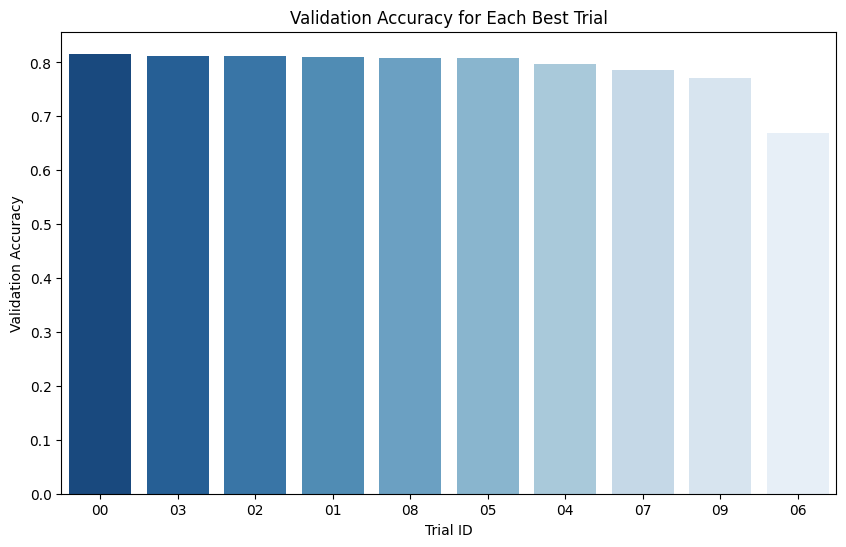

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns



# Access the best trials
best_trials = tuner.oracle.get_best_trials(num_trials=10)

# Extract relevant information from best trials
trial_ids = [trial.trial_id for trial in best_trials]
val_accuracies = [trial.metrics.get_last_value('val_accuracy') for trial in best_trials]

# Extract hyperparameters for each trial
hyperparameters = [trial.hyperparameters.values for trial in best_trials]

# Display hyperparameters in the console
for trial_id, hyperparams in zip(trial_ids, hyperparameters):
    print(f'Trial ID: {trial_id}, Hyperparameters: {hyperparams}')

# Define a color palette
reversed_gradient_palette = sns.color_palette("Blues", n_colors=len(trial_ids))[::-1]

# Plot the validation accuracies for the best trials 
plt.figure(figsize=(10, 6))
sns.barplot(x=trial_ids, y=val_accuracies, palette=reversed_gradient_palette)
plt.xlabel('Trial ID')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for Each Best Trial')
plt.show()


In [228]:
# Refit with the best hyperparameters
history = best_model.fit(bag_of_words_train, train_tags, 
                         validation_data=(bag_of_words_test, test_tags), 
                         epochs=5)

Epoch 1/5
613/613 [==============================] - 6s 10ms/step - loss: 0.0142 - accuracy: 0.9616 - val_loss: 0.0729 - val_accuracy: 0.7983
Epoch 2/5
613/613 [==============================] - 6s 10ms/step - loss: 0.0110 - accuracy: 0.9703 - val_loss: 0.0778 - val_accuracy: 0.7982
Epoch 3/5
613/613 [==============================] - 6s 10ms/step - loss: 0.0099 - accuracy: 0.9758 - val_loss: 0.0850 - val_accuracy: 0.7981
Epoch 4/5
613/613 [==============================] - 6s 10ms/step - loss: 0.0089 - accuracy: 0.9803 - val_loss: 0.0901 - val_accuracy: 0.7950
Epoch 5/5
613/613 [==============================] - 6s 10ms/step - loss: 0.0082 - accuracy: 0.9813 - val_loss: 0.0974 - val_accuracy: 0.7954


In [427]:
best_model.evaluate(bag_of_words_test, test_tags);

263/263 [==============================] - 1s 3ms/step - loss: 0.0974 - accuracy: 0.7954


263/263 [==============================] - 1s 3ms/step


/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/duncanwatson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dty

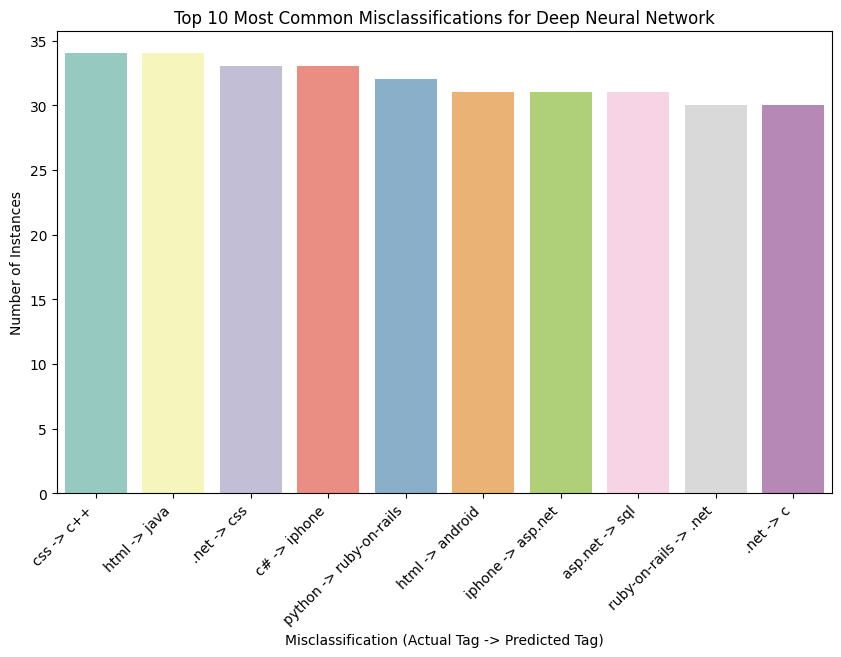

In [450]:
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras.preprocessing import text
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


# Predictions on the test set
y_pred = best_model.predict(bag_of_words_test)

# Binarize the predictions using a threshold 
threshold = 0.5
y_pred_binary = np.where(y_pred > threshold, 1, 0)

# Reverse the encoding on the tags
decoded_test_tags = tag_encoder.inverse_transform(test_tags)
decoded_pred_tags = tag_encoder.inverse_transform(y_pred_binary)

# Flatten the lists of lists
flat_decoded_test_tags = [tag for tags in decoded_test_tags for tag in tags]
flat_decoded_pred_tags = [tag for tags in decoded_pred_tags for tag in tags]

# Identify misclassifications
misclassifications = [(true_tag, pred_tag) for true_tag, pred_tag in zip(flat_decoded_test_tags, flat_decoded_pred_tags) if true_tag != pred_tag]

# Count the occurrences of each misclassification
misclassification_counts = Counter(misclassifications)

# Get the top N most common misclassifications
top_n = 10  # Replace with the desired number of top misclassifications
top_misclassifications = misclassification_counts.most_common(top_n)

# Plotting the top N most common misclassifications
plt.figure(figsize=(10, 6))
sns.barplot(x=[f"{true_label} -> {pred_label}" for (true_label, pred_label), count in top_misclassifications],
            y=[count for _, count in top_misclassifications], palette="Set3")
plt.title("Top {} Most Common Misclassifications for Deep Neural Network".format(top_n))
plt.xlabel("Misclassification (Actual Tag -> Predicted Tag)")
plt.ylabel("Number of Instances")
plt.xticks(rotation=45, ha="right")
plt.show()


We now perform 5-fold Cross validation

In [166]:
from sklearn.model_selection import KFold

tokenizer_cv = text.Tokenizer(num_words=32000)
tokenizer_cv.fit_on_texts(data["post"])

# for simplicity we will just take the training set defined earlier as ou data set
X = tokenizer_cv.texts_to_matrix(data["post"])
y = tags_encoded

kf = KFold(n_splits=5)

#iterate through the splits and save the results
validation_scores = []
loss_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    best_model = tuner.get_best_models(num_models=1)[0]
    best_model.fit(X_train, y_train,epochs=5, batch_size=128, validation_split=0.1)
    validation_score = best_model.evaluate(X_test, y_test,batch_size=128)[1]
    validation_scores.append(validation_score)

#get average score
#validation_score = np.average(validation_scores)


Epoch 1/5
158/158 [==============================] - 4s 25ms/step - loss: 0.1312 - accuracy: 0.4838 - val_loss: 0.0706 - val_accuracy: 0.7402
Epoch 2/5
158/158 [==============================] - 4s 24ms/step - loss: 0.0600 - accuracy: 0.7832 - val_loss: 0.0589 - val_accuracy: 0.7763
Epoch 3/5
158/158 [==============================] - 4s 24ms/step - loss: 0.0400 - accuracy: 0.8660 - val_loss: 0.0571 - val_accuracy: 0.7862
Epoch 4/5
158/158 [==============================] - 4s 24ms/step - loss: 0.0282 - accuracy: 0.9118 - val_loss: 0.0581 - val_accuracy: 0.7951
Epoch 5/5
44/44 [==============================] - 1s 14ms/step - loss: 0.0582 - accuracy: 0.7982
Epoch 1/5
158/158 [==============================] - 4s 25ms/step - loss: 0.1321 - accuracy: 0.4821 - val_loss: 0.0705 - val_accuracy: 0.7420
Epoch 2/5
158/158 [==============================] - 4s 24ms/step - loss: 0.0598 - accuracy: 0.7860 - val_loss: 0.0590 - val_accuracy: 0.7750
Epoch 3/5
158/158 [==============================]

In [168]:
accuracy_values = validation_scores

# Calculate mean, median, min, max, 1st quantile, and 3rd quantile
mean_value = np.mean(accuracy_values)
median_value = np.median(accuracy_values)
min_value = np.min(accuracy_values)
max_value = np.max(accuracy_values)
quantile_25 = np.percentile(accuracy_values, 25)
quantile_75 = np.percentile(accuracy_values, 75)

# Display the results in a table
print("Accuracy Statistics:")
print("---------------------")
print(f"Mean       : {mean_value:.4f}")
print(f"Median     : {median_value:.4f}")
print(f"Min        : {min_value:.4f}")
print(f"Max        : {max_value:.4f}")
print(f"1st Quantile: {quantile_25:.4f}")
print(f"3rd Quantile: {quantile_75:.4f}")

Accuracy Statistics:
---------------------
Mean       : 0.8017
Median     : 0.8025
Min        : 0.7971
Max        : 0.8071
1st Quantile: 0.7982
3rd Quantile: 0.8034


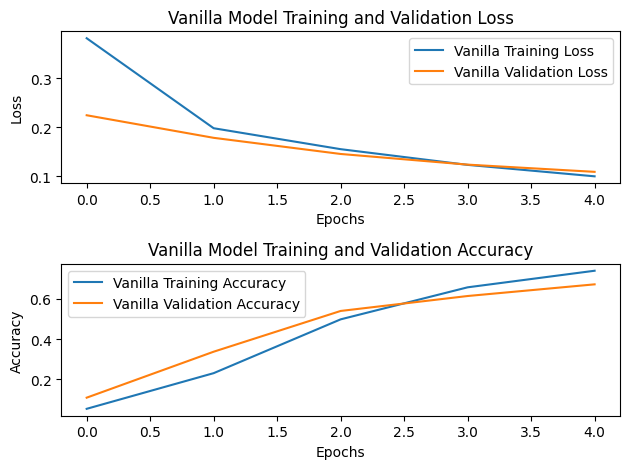

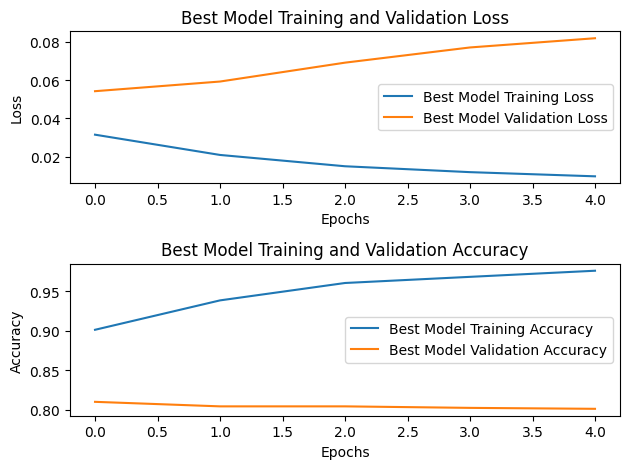

In [109]:
import matplotlib.pyplot as plt


# Plot training & validation loss for the vanilla model
plt.subplot(2, 1, 1)
plt.plot(history_vanilla.history['loss'], label='Vanilla Training Loss')
plt.plot(history_vanilla.history['val_loss'], label='Vanilla Validation Loss')
plt.title('Vanilla Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy for the vanilla model
plt.subplot(2, 1, 2)
plt.plot(history_vanilla.history['accuracy'], label='Vanilla Training Accuracy')
plt.plot(history_vanilla.history['val_accuracy'], label='Vanilla Validation Accuracy')
plt.title('Vanilla Model Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Repeat the process for the best model
plt.figure()

# Plot training & validation loss for the best model
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Best Model Training Loss')
plt.plot(history.history['val_loss'], label='Best Model Validation Loss')
plt.title('Best Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy for the best model
plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Best Model Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Best Model Validation Accuracy')
plt.title('Best Model Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [422]:
np.where(decoded_test_tags!=decoded_pred_tags)

(array([0]),)

## Submission for NNs

In [196]:
import numpy as np
y_pred = []
for i in range(len(bow_test)):
    prediction = best_model.predict(np.array([bow_test[i]]), verbose = 0)
    text_labels = tag_encoder.classes_ 
    predicted_label = text_labels[np.argmax(prediction[0])]
    y_pred.append(predicted_label)

In [201]:
data_test = pd.read_csv("test.csv")

In [202]:
solution = data_test
solution.insert(2, "tags", y_pred) # make sure that the column of predictions is called tags

In [203]:
solution = solution.drop(['post'], axis=1)

In [204]:
solution.to_csv("solution_32.csv", index = False)